# 2. Линейная регрессия

**Цель работы**: Изучить основные понятия машинного обучения, исследовать методы решения задачи регрессии, применить полученные знания для решения практических задач.

## Регрессия

### Обучающая выборка

Задача регрессии заключается в поиске зависимости некоторой переменной $y$ от другой переменной $x$. При этом переменная $x$ может быть векторной.

$$x=(x_1, x_2, \dots, x_n).$$

В этом случае говорят о *множественной регрессии*. В противном случае, если $x$ — скаляр, регрессию называют *парной*.

Компоненты $x_j$ называются *признаками*.

Набор данных, который используется для восстановления зависимости называется *обучающей выборкой*. Она представляет собой пару $(X, Y)$, где

$$X = 
\left(
\begin{array}%
x^{(1)}\\
x^{(2)}\\
\vdots\\
x^{(m)}\\
\end{array}
\right) = 
\left(
\begin{array}%
x^{(1)}_1&x^{(1)}_2&\dots&x^{(1)}_n\\
x^{(2)}_1&x^{(2)}_2&\dots&x^{(2)}_n\\
\vdots&\vdots&\ddots&\vdots\\\
x^{(m)}_1&x^{(m)}_2&\dots&x^{(m)}_n\\
\end{array}
\right),
Y = 
\left(
\begin{array}%
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{array}
\right).
$$

Пара $(x^{(i)}, y^{(i)})$ называется *прецедентом*.

### Линейная регрессия

Простейший случай регрессии — линейная регрессия. В ней искомая зависимость описывается линейной функцией.

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta_0 + \sum_{j=1}^n\theta_jx_j.$$

Здесь $h_{\theta}(x)$ — обучаемая (в данном случае линейная) модель описывающая зависимость $y$ от $x$. Параметры $\theta_j$ — параметры модели, а $\theta$ — вектор параметров.

$$\theta = \left(
\begin{array}%
\theta_0\\
\theta_1\\
\theta_2\\
\vdots\\
\theta_n\\
\end{array}
\right).
$$

Для упрощения записи выражений можно ввести фиктивный признак 

$$x_0 \equiv 1.$$

Этот признак добавляется к исходным данным как столбец из 1 в матрице $X$.

Тогда модель записывается как скалярное произведение

$$h_{\theta}(x) = \sum_{j=1}^m x_j \theta_j = x \theta.$$

Значения, предсказанные моделью для каждого набора признаком из обучающей выборки можно вычислить аналогично.

$$h_{\theta}(X) = X \theta.$$

В этом случае получаем вектор-столбец со значениями $h_{\theta}(x^{(i)})$ для всех $i$.

### Функция потерь

Параметры $\theta$ выбираются таким образом, чтобы минимизировать ошибку между предсказанными ($h_{\theta}(X)$) и известными в обучающей выборке ($Y$) значениями.

Часто в качестве меры такой ошибки берут среднеквадратическое отклонение.

$$J(\theta) = \frac1{2m}\sum_{i=1}^{m}\left[h_{\theta}(x^{(i)})-y^{(i)}\right]^2$$

Функция $J(\theta)$ называется *функцией потерь*.

Тогда параметры модели находят как аргумент минимума функции потерь

$$\theta = \arg\min_{\theta}J(\theta).$$

## Задание

В настоящей лабораторной работе требуется решить задачу поиска оптимального ветора $\theta$ с помощью следующих методов:

- нормальное уравнение,
- метод градиентного спуска,
- метод BFGS (алгоритм реализован в библиотеке SciPy).

Дополнительное задание: попробуйте нормировать исходные данные. Не забудьте сохранить параметры, с которыми выполнялась нормализация (среднее значение и разброс).

## Подготовка библиотек

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as so
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='Verdana')

## Задача 1. Зависимость роста от возраста

Требуется найти зависимость роста (в метрах) от возраста (в годах) детей.

Загрузим обучающую выборку.

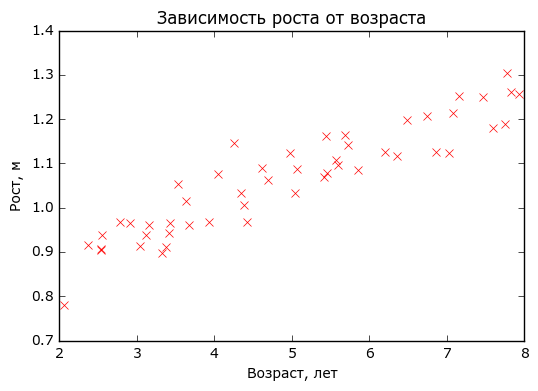

In [2]:
data = sio.loadmat('heights.mat')
Xdata = data['age']
ydata = data['height']

# Xp, Yp задают линию, которая будет отображена на графике поверх данных
def plot_data(X, y, Xp=None, yp=None):
    plt.plot(X, y, 'xr')
    if Xp is not None and yp is not None:
        plt.plot(Xp, yp, '-b')
    plt.xlabel('Возраст, лет')
    plt.ylabel('Рост, м')
    plt.title('Зависимость роста от возраста')
    plt.show()

plot_data(Xdata, ydata)

Введём вспомогательные величины: $m$ — число прецедентов, $n$ — номер последнего признака. (В функциях ими пользоваться нежелательно, так как функции должны быть как можно более изолированы от остального кода.)

In [3]:
m, n = Xdata.shape

Добавим к матрице $X$ слева столбец из единиц с помощью функции `np.concatenate`. Не забудьте в дальнейшем при расчётах использовать матрицу `X1` вместо `X`.

In [4]:
Xdata1 = np.concatenate([np.ones((m,1)), Xdata], axis=1)

Запишите выражение для модели $h_{\theta}(x)$.

$x$ может быть как вектор-строкой размера $1\times (n+1)$, так и матрицей (то есть набором вектор-строк).

$\theta$ — вектор-столбец размера $(n+1)\times 1$.

Функция должна возвращать предсказанное значение для каждой строки параметра `X`.

In [5]:
def h(X, theta):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    
    
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return np.dot(X, theta)#np.ones((X.shape[0], 1))
    ###

Проверим работу функции для прямой пропорциональности. Параметры $\theta$ выбраны произвольно и не соответствуют искомому решению.

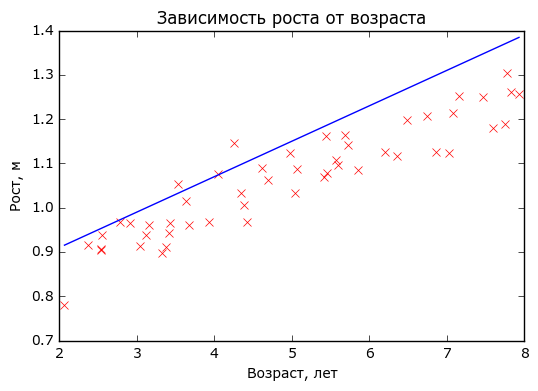

In [6]:
theta = np.array([[0.75], [0.08]])
yp = h(Xdata1, theta) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

### Нормальное уравнение
Найдём $\theta$ с помощью нормального уравнения.

In [7]:
# ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
import numpy.linalg as linalg
theta_norm = np.dot(np.dot(linalg.inv(np.dot(Xdata1.T,Xdata1)),Xdata1.T), ydata)
print(theta_norm)
###

[[ 0.75016254]
 [ 0.06388117]]


Графически оценим результаты вычислений.

[[ 0.75016254]
 [ 0.06388117]]


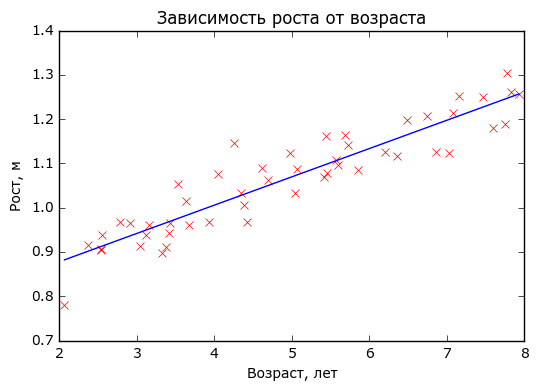

In [8]:
print (theta_norm)
yp = h(Xdata1, theta_norm) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

### Градиентный спуск

Найдём $\theta$ методом градиентного спуска. Для этого определим функции `J` и `dJ`, соответствующие функции потерь и вектору градиента.

Функция `J` принимает на входе как вектор-столбец параметров `theta`, так и данные обучающей выборки — `X` и `y`. Функция должна вернуть число, характеризующее среднюю ошибку предсказанного моделью значения от истинного.

In [9]:
def J(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    m = len(X)
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return 1/(2*m)*(h(X,theta)-y).T.dot(h(X,theta)-y)
J(theta, Xdata1, yp)

    ###

array([[ 0.00351622]])

Параметры функции, вычисляющей градиент, те же, но она должна вернуть вектор-столбец со значениями производной $\frac{\partial J(\theta)}{\partial\theta_j}$ по каждому из параметров $\theta_j$. Этот вектор-столбец, очевидно, должен иметь те же размеры, что и вектор $\theta$.

In [10]:
def dJ(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    m = len(X)
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return 1/m*(X.T.dot((X.dot(theta)-y)))
    ###
dJ(theta, Xdata1, yp)

array([[ 0.0791997 ],
       [ 0.43708551]])

Сам градиентный спуск выполняется достаточно просто: выполняются шаги в сторону, противоположную направлению градиента, пока его норма не станет достаточно малой (то есть, не станет меньше некоторого $\varepsilon$). Конечно, за простоту приходится платить — более совершенные методы точнее и быстрее сходятся.

Для работы метода необходимо правильно подобрать параметры $\varepsilon$ (параметр, управляющей точностью) и $\alpha$ (коэффициент шага градиентного спуска).

In [11]:
eps = 0.0001
# НАЙДИТЕ ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ КОЭФФИЦИЕНТА alpha
alpha = 0.01

Основной алгоритм выглядит следующим образом.

В массиве `norms` накапливаются значения нормы на каждом шаге цикла. Они нужны для точной «подстройки» парметра $\alpha$.

Если число итераций превышает `Kmax`, алгоритм завершается принудительно.

In [12]:
k, Kmax = 0, 1000000
norms = []

# Инициализация
theta_grad = np.zeros((n+1, 1))
while True:
    d = dJ(theta_grad, Xdata1, ydata) # Текущее значение градиента
    
    norm = np.linalg.norm(d)
    norms.append(norm)
    k += 1
    if k > Kmax or norm < eps: break

    # Один шаг градиентного спуска
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    theta_grad -= alpha*d
    ###

Построим график изменений нормы градиента в зависимости от номера итерации.

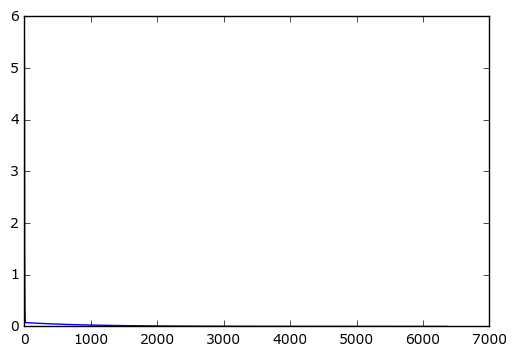

In [13]:
plt.plot(norms)
plt.show()

Графически оценим результаты вычислений.

[[ 0.74921938]
 [ 0.06405276]]


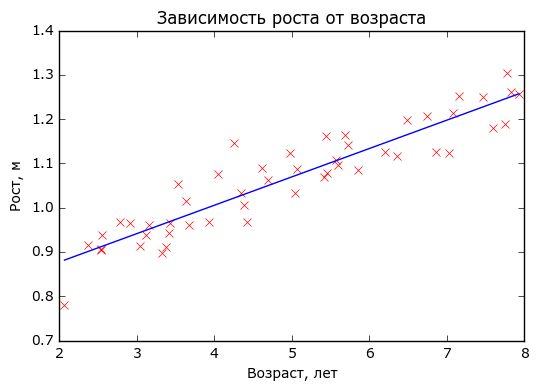

In [14]:
print (theta_grad)
yp = h(Xdata1, theta_grad) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

### Метод Бройдена — Флетчера — Гольдфарба — Шанно (BFGS)

Этот метод реализован в функции `sp.optimize.minimize`. Воспользуемся им, чтобы найти оптимальное значение вектора $\theta$. (Учтите, что команда находит минимум функции от нескольких переменных. Параметр `theta` нужно будет упаковать в вектор, а параметры `X` и `y` связать замыканием.)

По аналогии с функцией `Jv` напишите функцию `dJv` для вычисления градиента по одному параметру `theta`. Добавьте в `sp.optimize.minimize` параметр `jac=dJv` для ускорения расчётов и повышения точности.

In [15]:

def Jv(th):
    theta = np.array(th)
    theta = np.reshape(theta, (n+1, 1))
    return J(theta, Xdata1, ydata)[0, 0]

# ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
def dJv(th):
    theta = np.array(th)
    theta = np.reshape(theta, (n+1, 1))
    return dJ(theta, Xdata1, ydata)[0, 0]

result = so.minimize(Jv, [0.0] * (n+1), method='BFGS')
###

print(result)
theta_bfgs = np.reshape(result.x, (n+1, 1))

      fun: 0.0009870699732808402
 hess_inv: array([[ 9.2890347 , -1.68354088],
       [-1.68354088,  0.34193486]])
      jac: array([ -4.36557457e-11,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 0.75016281,  0.06388111])


Графически оценим результаты вычислений.

[[ 0.75016281]
 [ 0.06388111]]


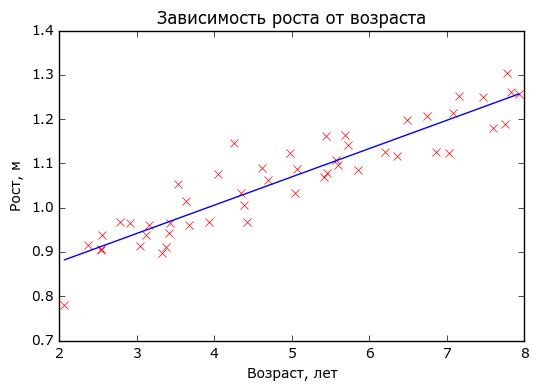

In [16]:
print (theta_bfgs)
yp = h(Xdata1, theta_bfgs) # Предсказанные значения
plot_data(Xdata, ydata, Xdata, yp)

### Упрощённая проверка моделей
При помощи каждой из моделей предскажите рост 4-летнего ребёнка.

In [17]:
# ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
#y4_norm = np.array([[1, 4]]).dot(theta_norm)
y4 = h(np.array([[1, 4]]), theta_norm)
y4_grad = h(np.array([[1, 4]]), theta_grad)
y4_bfgs = h(np.array([[1, 4]]), theta_bfgs)
###
print(y4)
print(y4_grad)
print(y4_bfgs)

[[ 1.0056872]]
[[ 1.00543043]]
[[ 1.00568725]]


## Задача 2. Цены на дом

Требуется найти зависимость стоимости дома (в долларах США) от двух параметров: площади (в кв. футах, первый столбец) и количества спален (второй столбец).

Загрузим исходные данные.

In [18]:
data = sio.loadmat('prices.mat')
Xdata = data['house']
ydata = data['price']

Дальнейшие вычисления с помощью обоих рассмотренных методов выполните самостоятельно. В этой задаче регрессия множественная, но если вы в предыдущей задачи использовали векторизованные вычисления, то функции не потребуют значительного изменения.

При помощи каждой из моделей предскажите цену на дом площадью 2104 кв. фута с 3 спальнями.

In [19]:
import numpy as np
import math as m
import scipy.io as sio
import scipy.optimize as so
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

rc('font', family='Verdana')

data = sio.loadmat('prices.mat')
Ydata = data['price']
Xdata = data['house']

In [20]:
m, n = Xdata.shape
Xdata1 = np.concatenate([np.ones((m,1)), Xdata], axis=1)
def h(X, theta):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    return np.dot(X, theta)

theta = np.array([[0], [0], [2]])
yp = h(Xdata1, theta) # Предсказанные значения


In [21]:
import numpy.linalg as linalg
theta_norm = np.dot(np.dot(linalg.inv(np.dot(Xdata1.T,Xdata1)),Xdata1.T), ydata)
print(theta_norm)

[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [22]:
def J(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    m = len(X)
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return 1/(2*m)*(h(X,theta)-y).T.dot(h(X,theta)-y)
J(theta, Xdata1, Ydata)

array([[  6.55893074e+10]])

In [23]:
def dJ(theta, X, y):
    # Проверки входных данных
    assert len(X.shape) == 2, "X — матрица?"
    assert X.shape[1] == n+1, "Неверный размер матрицы X. Забыли столбец из 1?" 
    assert X.shape[0] == y.shape[0], "Разное количество выходных и входных переменных"
    assert theta.shape == (n+1, 1), "Неверный размер матрицы theta"
    m = len(X)
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    return 1/m*(X.T.dot((X.dot(theta)-y)))
    ###
   
dJ(theta, Xdata1, Ydata)


array([[ -3.40406319e+05],
       [ -7.64195780e+08],
       [ -1.12034647e+06]])

In [24]:
eps = 0.001
# НАЙДИТЕ ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ КОЭФФИЦИЕНТА alpha
alpha = 0.00000003
print()

In [25]:
k, Kmax = 0, 100000
norms = []

# Инициализация
theta_grad = np.zeros((n+1, 1))
while True:
    d = dJ(theta_grad, Xdata1, Ydata) # Текущее значение градиента
    
    norm = np.linalg.norm(d)
    norms.append(norm)
    k += 1
    if k > Kmax or norm < eps: break

    # Один шаг градиентного спуска
    # ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
    

    theta_grad -= alpha*d
    ###
print(theta_grad)

[[  28.64554209]
 [ 165.29868738]
 [  49.94279673]]


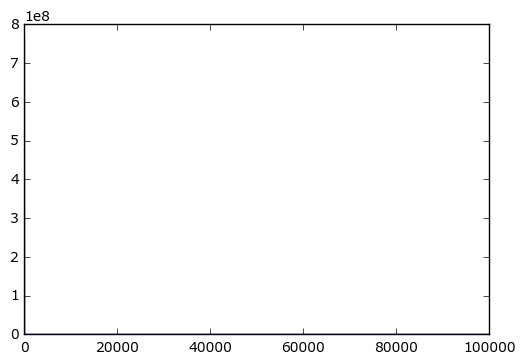

In [26]:
plt.plot(norms)

In [27]:

def Jv(th):
    theta = np.array(th)
    theta = np.reshape(theta, (n+1, 1))
    return J(theta, Xdata1, ydata)[0, 0]

# ИСПРАВЬТЕ ИЛИ ДОПОЛНИТЕ КОД НИЖЕ
def dJv(th):
    theta = np.array(th)
    theta = np.reshape(theta, (n+1, 1))
    return dJ(theta, Xdata1, ydata)[0, 0]

result = so.minimize(Jv, [0.0] * (n+1), method='BFGS')
###

print(result)
theta_bfgs = np.reshape(result.x, (n+1, 1))

      fun: 2043280225.0120716
 hess_inv: array([[  4.42086792e-01,   2.75891713e-04,  -3.23926442e-01],
       [  2.75891713e-04,   3.61971104e-07,  -2.04528345e-04],
       [ -3.23926442e-01,  -2.04528345e-04,   2.39038088e-01]])
      jac: array([  16., -560.,   16.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 422
      nit: 18
     njev: 82
   status: 2
  success: False
        x: array([ 89524.33971679,    139.20053011,  -8709.03062784])


In [35]:
y4 = h(np.array([[1, 2104, 4]]), theta_norm)
y4_grad = h(np.array([[1, 2104, 4]]), theta_grad)
y4_bfgs = h(np.array([[1, 2104, 4]]), theta_bfgs)
print(y4)
print(y4_grad)
print(y4_bfgs)
Ydata[0]

[[ 347545.09122657]]
[[ 348016.85497167]]
[[ 347566.13256343]]


array([ 399900.])

# Выводы

Сделайте выводы о применимости рассмотренных методов для решения задачи линейной регрессии.

- Какие подготовительные действия приходится выполнять перед собственно обучением? Почему?
- Какой из рассмотренных методов проще? Какой точнее?
- Какие преимущества и недостатки у каждого и методов?
- С какими сложностями вы столкнулись в ходе выполнения работы?